# Curvilineargrid Basics

This is the basic introduction for using `meshkernel` library for generating curvilinear grids.

At the very beginning, the necessary libraries have to be imported.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from meshkernel import CurvilinearParameters, GeometryList, MeshKernel, SplinesToCurvilinearParameters

## Generate a curvilinear grid using the transfinite interpolation method

We first create the splines used for curvilinear grid generation. Each spline is separated by -999.0

In [3]:
separator = -999.0
splines_x = np.array([2.0, 4.0, 7.0, separator,
                      -1.0, 1.0, 5.0, separator,
                      3.0, -2.0, separator,
                      7.0, 4.0], dtype=np.double)
splines_y = np.array([1.0, 3.0, 4.0, separator,
                      4.0, 6.0, 7.0, separator,
                      1.0, 6.0, separator,
                      3.0, 8.0], dtype=np.double)
splines_values = np.zeros_like(splines_x)
splines = GeometryList(splines_x, splines_y, splines_values)

We can set the number of m and n in a new CurvilinearParameters instance

In [4]:
curvilinearParameters = CurvilinearParameters()
curvilinearParameters.n_refinement = 10
curvilinearParameters.m_refinement = 10

We now create a new instance of the MeshKernel library

In [5]:
mk = MeshKernel()

And used the transfinite algorithm to create a new curvilinear grid

In [6]:
mk.curvilinear_compute_transfinite_from_splines(splines, curvilinearParameters)
curvilinear_grid_transfinite = mk.curvilineargrid_get()

Plot the result

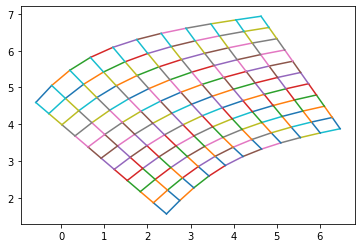

In [7]:
fig, ax = plt.subplots()
curvilinear_grid_transfinite.plot_edges(ax)

## Generate a curvilinear grid using the advancing front method

We first create the splines for curvilinear grid generation. Each spline is separated by -999.0

In [8]:
separator = -999.0
splines_x = np.array([152.001571655273, 374.752960205078, 850.255920410156, separator,
                      72.5010681152344, 462.503479003906, separator], dtype=np.double)
splines_y = np.array([86.6264953613281, 336.378997802734, 499.130676269531, separator,
                      391.129577636719, 90.3765411376953, separator], dtype=np.double)

splines_values = np.zeros_like(splines_x)
splines = GeometryList(splines_x, splines_y, splines_values)

We can set the number of m and n in a new CurvilinearParameters instance

In [13]:
curvilinearParameters = CurvilinearParameters()
curvilinearParameters.n_refinement = 10
curvilinearParameters.m_refinement = 10

For this algorithm we also need to set the additional parameters required for generating a curvilinear grid from splines

In [14]:
splinesToCurvilinearParameters = SplinesToCurvilinearParameters()
splinesToCurvilinearParameters.aspect_ratio = 0.1
splinesToCurvilinearParameters.aspect_ratio_grow_factor = 1.1
splinesToCurvilinearParameters.average_width = 50.0
splinesToCurvilinearParameters.nodes_on_top_of_each_other_tolerance = 1e-4
splinesToCurvilinearParameters.min_cosine_crossing_angles = 0.95
splinesToCurvilinearParameters.check_front_collisions = 0
splinesToCurvilinearParameters.curvature_adapted_grid_spacing = 1
splinesToCurvilinearParameters.remove_skinny_triangles = 0

We can now use the advancing front algorithm to create a new curvilinear grid

In [15]:
mk.curvilinear_compute_orthogonal_from_splines(splines, curvilinearParameters, splinesToCurvilinearParameters)
curvilinear_grid_orthogonal = mk.curvilineargrid_get()

Plot the result

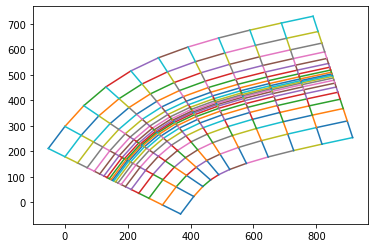

In [16]:
fig, ax = plt.subplots()
curvilinear_grid_orthogonal.plot_edges(ax)

## Create an utility function for generating a mesg kernel instance with a curvilinear mesh

In [17]:
def create_meshkernel_instance_with_curvilinear_grid():
    r"""A local function for creating an instance of meshkernel with a curvilinear grid.
    """
    mk = MeshKernel()

    separator = -999.0
    splines_x = np.array([2.0, 4.0, 7.0, separator,
                          -1.0, 1.0, 5.0, separator,
                          3.0, -2.0, separator,
                          7.0, 4.0], dtype=np.double)
    splines_y = np.array([1.0, 3.0, 4.0, separator,
                          4.0, 6.0, 7.0, separator,
                          1.0, 6.0, separator,
                          3.0, 8.0], dtype=np.double)
    splines_values = np.zeros_like(splines_x)
    splines = GeometryList(splines_x, splines_y, splines_values)

    curvilinear_parameters = CurvilinearParameters()
    curvilinear_parameters.n_refinement = 10
    curvilinear_parameters.m_refinement = 10

    mk.curvilinear_compute_transfinite_from_splines(splines, curvilinear_parameters)

    return mk

## Refine and derefine a curvilinear mesh

### Plot before refinement

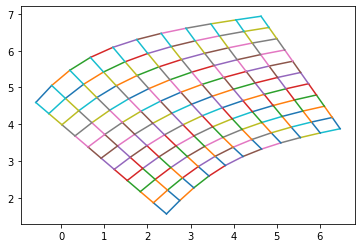

In [49]:
mk = create_meshkernel_instance_with_curvilinear_grid()
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

Add two horizontal grid lines for each row within two selected points and plot the results

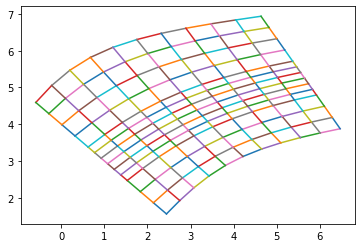

In [50]:
mk.curvilinear_refine(2.299,4.612,3.074,3.684, 2)
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

Derefine the curvilinear grid on the same rows

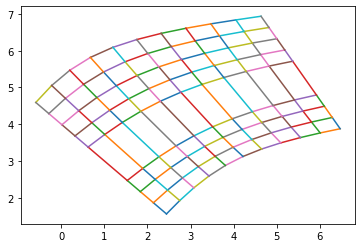

In [51]:
mk.curvilinear_derefine(2.299,4.612,3.074,3.684)
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)